In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Loading dataset
train_data=pd.read_excel("C:/Users/risha/Downloads/q1train.xlsx")
test_data=pd.read_excel("C:/Users/risha/Downloads/q1test.xlsx")

In [6]:
train_data.head()

,Aptitude,Verbal,Label
0,34.723660,30.386711,0
1,30.386711,35.947409,0
2,35.947409,60.282599,0
3,45.183277,61.206665,0
4,95.961555,75.113658,0


In [7]:
#assigning X train, Y train, X test
tr=train_data.to_numpy()
ts=test_data.to_numpy()
X_train=tr[:,0:2]
Y_train=tr[:,-1]
X_test=ts[:,0:2]

In [8]:
#Normalizing Dataset
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
#Reshaping arrays
X_train=X_train.T
X_test=X_test.T
#converting rank 1 matrix to (,1)
Y_train=np.reshape(Y_train,(Y_train.shape[0],1))
Y_train=Y_train.T

In [11]:
def sigmoid(x):
#     Compute the sigmoid of x
    s = 1/(1+np.exp(-x))
    return s

In [12]:
#Let's first define the neural net structure
def net_layer_sizes(X, Y):
  
    """
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [13]:
#Initializing Model Parameters
def initialize_parameters(n_x, n_h, n_y):
    """
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    W1 = np.random.randn(n_h,n_x) * 0.1
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.1
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [14]:
#Forward Propagation
def forward_propagation(X, parameters):
    """
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [15]:
#Computing cost function
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation
    
    Returns:
    cost -- cross-entropy cost given equation
    
    """
    
    m = Y.shape[1] # number of example

    logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost = (-1/m) * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  
    return cost

In [16]:
#Back propagation
def backward_propagation(parameters, cache, X, Y):
    """
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [17]:
#Using gradient descent, updating parameters
def update_parameters(parameters, grads, learning_rate):
    """
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = net_layer_sizes(X, Y)[0]
    n_y = net_layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    cost_list=[]
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        cost_list.append(cost)
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters,cost_list

In [19]:
parameters,cost_list = nn_model(X_train, Y_train, 4, 0.001,num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.694705
Cost after iteration 1: 0.694698
Cost after iteration 2: 0.694691
Cost after iteration 3: 0.694684
Cost after iteration 4: 0.694677
Cost after iteration 5: 0.694670
Cost after iteration 6: 0.694663
Cost after iteration 7: 0.694656
Cost after iteration 8: 0.694649
Cost after iteration 9: 0.694642
Cost after iteration 10: 0.694636
Cost after iteration 11: 0.694629
Cost after iteration 12: 0.694622
Cost after iteration 13: 0.694615
Cost after iteration 14: 0.694608
Cost after iteration 15: 0.694601
Cost after iteration 16: 0.694594
Cost after iteration 17: 0.694587
Cost after iteration 18: 0.694580
Cost after iteration 19: 0.694573
Cost after iteration 20: 0.694566
Cost after iteration 21: 0.694560
Cost after iteration 22: 0.694553
Cost after iteration 23: 0.694546
Cost after iteration 24: 0.694539
Cost after iteration 25: 0.694532
Cost after iteration 26: 0.694525
Cost after iteration 27: 0.694518
Cost after iteration 28: 0.694511
Cost after iteration 29:

Cost after iteration 848: 0.688919
Cost after iteration 849: 0.688912
Cost after iteration 850: 0.688905
Cost after iteration 851: 0.688898
Cost after iteration 852: 0.688891
Cost after iteration 853: 0.688884
Cost after iteration 854: 0.688877
Cost after iteration 855: 0.688870
Cost after iteration 856: 0.688863
Cost after iteration 857: 0.688856
Cost after iteration 858: 0.688849
Cost after iteration 859: 0.688842
Cost after iteration 860: 0.688835
Cost after iteration 861: 0.688828
Cost after iteration 862: 0.688821
Cost after iteration 863: 0.688814
Cost after iteration 864: 0.688807
Cost after iteration 865: 0.688800
Cost after iteration 866: 0.688793
Cost after iteration 867: 0.688786
Cost after iteration 868: 0.688779
Cost after iteration 869: 0.688772
Cost after iteration 870: 0.688765
Cost after iteration 871: 0.688758
Cost after iteration 872: 0.688751
Cost after iteration 873: 0.688744
Cost after iteration 874: 0.688737
Cost after iteration 875: 0.688730
Cost after iteration

Cost after iteration 1718: 0.682204
Cost after iteration 1719: 0.682195
Cost after iteration 1720: 0.682186
Cost after iteration 1721: 0.682178
Cost after iteration 1722: 0.682169
Cost after iteration 1723: 0.682160
Cost after iteration 1724: 0.682152
Cost after iteration 1725: 0.682143
Cost after iteration 1726: 0.682134
Cost after iteration 1727: 0.682125
Cost after iteration 1728: 0.682117
Cost after iteration 1729: 0.682108
Cost after iteration 1730: 0.682099
Cost after iteration 1731: 0.682090
Cost after iteration 1732: 0.682082
Cost after iteration 1733: 0.682073
Cost after iteration 1734: 0.682064
Cost after iteration 1735: 0.682055
Cost after iteration 1736: 0.682047
Cost after iteration 1737: 0.682038
Cost after iteration 1738: 0.682029
Cost after iteration 1739: 0.682020
Cost after iteration 1740: 0.682011
Cost after iteration 1741: 0.682003
Cost after iteration 1742: 0.681994
Cost after iteration 1743: 0.681985
Cost after iteration 1744: 0.681976
Cost after iteration 1745: 0

Cost after iteration 2654: 0.672480
Cost after iteration 2655: 0.672468
Cost after iteration 2656: 0.672456
Cost after iteration 2657: 0.672443
Cost after iteration 2658: 0.672431
Cost after iteration 2659: 0.672418
Cost after iteration 2660: 0.672406
Cost after iteration 2661: 0.672394
Cost after iteration 2662: 0.672381
Cost after iteration 2663: 0.672369
Cost after iteration 2664: 0.672357
Cost after iteration 2665: 0.672344
Cost after iteration 2666: 0.672332
Cost after iteration 2667: 0.672319
Cost after iteration 2668: 0.672307
Cost after iteration 2669: 0.672294
Cost after iteration 2670: 0.672282
Cost after iteration 2671: 0.672270
Cost after iteration 2672: 0.672257
Cost after iteration 2673: 0.672245
Cost after iteration 2674: 0.672232
Cost after iteration 2675: 0.672220
Cost after iteration 2676: 0.672207
Cost after iteration 2677: 0.672195
Cost after iteration 2678: 0.672182
Cost after iteration 2679: 0.672170
Cost after iteration 2680: 0.672157
Cost after iteration 2681: 0

Cost after iteration 3566: 0.659006
Cost after iteration 3567: 0.658989
Cost after iteration 3568: 0.658972
Cost after iteration 3569: 0.658954
Cost after iteration 3570: 0.658937
Cost after iteration 3571: 0.658919
Cost after iteration 3572: 0.658902
Cost after iteration 3573: 0.658884
Cost after iteration 3574: 0.658867
Cost after iteration 3575: 0.658850
Cost after iteration 3576: 0.658832
Cost after iteration 3577: 0.658815
Cost after iteration 3578: 0.658797
Cost after iteration 3579: 0.658780
Cost after iteration 3580: 0.658762
Cost after iteration 3581: 0.658745
Cost after iteration 3582: 0.658727
Cost after iteration 3583: 0.658710
Cost after iteration 3584: 0.658692
Cost after iteration 3585: 0.658675
Cost after iteration 3586: 0.658657
Cost after iteration 3587: 0.658640
Cost after iteration 3588: 0.658622
Cost after iteration 3589: 0.658605
Cost after iteration 3590: 0.658587
Cost after iteration 3591: 0.658570
Cost after iteration 3592: 0.658552
Cost after iteration 3593: 0

Cost after iteration 4481: 0.640550
Cost after iteration 4482: 0.640527
Cost after iteration 4483: 0.640504
Cost after iteration 4484: 0.640481
Cost after iteration 4485: 0.640458
Cost after iteration 4486: 0.640435
Cost after iteration 4487: 0.640412
Cost after iteration 4488: 0.640390
Cost after iteration 4489: 0.640367
Cost after iteration 4490: 0.640344
Cost after iteration 4491: 0.640321
Cost after iteration 4492: 0.640298
Cost after iteration 4493: 0.640275
Cost after iteration 4494: 0.640252
Cost after iteration 4495: 0.640229
Cost after iteration 4496: 0.640206
Cost after iteration 4497: 0.640183
Cost after iteration 4498: 0.640160
Cost after iteration 4499: 0.640137
Cost after iteration 4500: 0.640114
Cost after iteration 4501: 0.640091
Cost after iteration 4502: 0.640067
Cost after iteration 4503: 0.640044
Cost after iteration 4504: 0.640021
Cost after iteration 4505: 0.639998
Cost after iteration 4506: 0.639975
Cost after iteration 4507: 0.639952
Cost after iteration 4508: 0

Cost after iteration 5477: 0.615189
Cost after iteration 5478: 0.615162
Cost after iteration 5479: 0.615134
Cost after iteration 5480: 0.615106
Cost after iteration 5481: 0.615079
Cost after iteration 5482: 0.615051
Cost after iteration 5483: 0.615024
Cost after iteration 5484: 0.614996
Cost after iteration 5485: 0.614968
Cost after iteration 5486: 0.614941
Cost after iteration 5487: 0.614913
Cost after iteration 5488: 0.614886
Cost after iteration 5489: 0.614858
Cost after iteration 5490: 0.614830
Cost after iteration 5491: 0.614803
Cost after iteration 5492: 0.614775
Cost after iteration 5493: 0.614747
Cost after iteration 5494: 0.614720
Cost after iteration 5495: 0.614692
Cost after iteration 5496: 0.614665
Cost after iteration 5497: 0.614637
Cost after iteration 5498: 0.614609
Cost after iteration 5499: 0.614582
Cost after iteration 5500: 0.614554
Cost after iteration 5501: 0.614526
Cost after iteration 5502: 0.614499
Cost after iteration 5503: 0.614471
Cost after iteration 5504: 0

Cost after iteration 6417: 0.588356
Cost after iteration 6418: 0.588327
Cost after iteration 6419: 0.588298
Cost after iteration 6420: 0.588269
Cost after iteration 6421: 0.588240
Cost after iteration 6422: 0.588211
Cost after iteration 6423: 0.588182
Cost after iteration 6424: 0.588153
Cost after iteration 6425: 0.588124
Cost after iteration 6426: 0.588095
Cost after iteration 6427: 0.588066
Cost after iteration 6428: 0.588037
Cost after iteration 6429: 0.588008
Cost after iteration 6430: 0.587979
Cost after iteration 6431: 0.587951
Cost after iteration 6432: 0.587922
Cost after iteration 6433: 0.587893
Cost after iteration 6434: 0.587864
Cost after iteration 6435: 0.587835
Cost after iteration 6436: 0.587806
Cost after iteration 6437: 0.587777
Cost after iteration 6438: 0.587748
Cost after iteration 6439: 0.587719
Cost after iteration 6440: 0.587690
Cost after iteration 6441: 0.587661
Cost after iteration 6442: 0.587632
Cost after iteration 6443: 0.587603
Cost after iteration 6444: 0

Cost after iteration 7345: 0.562136
Cost after iteration 7346: 0.562109
Cost after iteration 7347: 0.562082
Cost after iteration 7348: 0.562055
Cost after iteration 7349: 0.562028
Cost after iteration 7350: 0.562001
Cost after iteration 7351: 0.561974
Cost after iteration 7352: 0.561946
Cost after iteration 7353: 0.561919
Cost after iteration 7354: 0.561892
Cost after iteration 7355: 0.561865
Cost after iteration 7356: 0.561838
Cost after iteration 7357: 0.561811
Cost after iteration 7358: 0.561784
Cost after iteration 7359: 0.561757
Cost after iteration 7360: 0.561730
Cost after iteration 7361: 0.561703
Cost after iteration 7362: 0.561676
Cost after iteration 7363: 0.561649
Cost after iteration 7364: 0.561622
Cost after iteration 7365: 0.561595
Cost after iteration 7366: 0.561568
Cost after iteration 7367: 0.561541
Cost after iteration 7368: 0.561514
Cost after iteration 7369: 0.561487
Cost after iteration 7370: 0.561460
Cost after iteration 7371: 0.561433
Cost after iteration 7372: 0

Cost after iteration 8307: 0.537932
Cost after iteration 8308: 0.537909
Cost after iteration 8309: 0.537886
Cost after iteration 8310: 0.537863
Cost after iteration 8311: 0.537840
Cost after iteration 8312: 0.537817
Cost after iteration 8313: 0.537794
Cost after iteration 8314: 0.537771
Cost after iteration 8315: 0.537748
Cost after iteration 8316: 0.537725
Cost after iteration 8317: 0.537702
Cost after iteration 8318: 0.537679
Cost after iteration 8319: 0.537656
Cost after iteration 8320: 0.537633
Cost after iteration 8321: 0.537610
Cost after iteration 8322: 0.537588
Cost after iteration 8323: 0.537565
Cost after iteration 8324: 0.537542
Cost after iteration 8325: 0.537519
Cost after iteration 8326: 0.537496
Cost after iteration 8327: 0.537473
Cost after iteration 8328: 0.537450
Cost after iteration 8329: 0.537427
Cost after iteration 8330: 0.537404
Cost after iteration 8331: 0.537382
Cost after iteration 8332: 0.537359
Cost after iteration 8333: 0.537336
Cost after iteration 8334: 0

Cost after iteration 9277: 0.517989
Cost after iteration 9278: 0.517971
Cost after iteration 9279: 0.517953
Cost after iteration 9280: 0.517935
Cost after iteration 9281: 0.517917
Cost after iteration 9282: 0.517899
Cost after iteration 9283: 0.517880
Cost after iteration 9284: 0.517862
Cost after iteration 9285: 0.517844
Cost after iteration 9286: 0.517826
Cost after iteration 9287: 0.517808
Cost after iteration 9288: 0.517790
Cost after iteration 9289: 0.517772
Cost after iteration 9290: 0.517754
Cost after iteration 9291: 0.517736
Cost after iteration 9292: 0.517718
Cost after iteration 9293: 0.517700
Cost after iteration 9294: 0.517682
Cost after iteration 9295: 0.517664
Cost after iteration 9296: 0.517646
Cost after iteration 9297: 0.517627
Cost after iteration 9298: 0.517609
Cost after iteration 9299: 0.517591
Cost after iteration 9300: 0.517573
Cost after iteration 9301: 0.517555
Cost after iteration 9302: 0.517537
Cost after iteration 9303: 0.517519
Cost after iteration 9304: 0

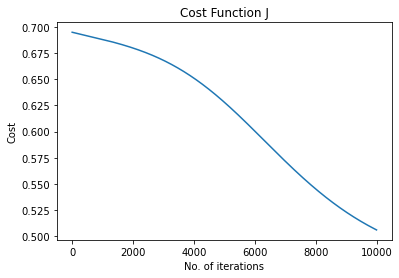

In [20]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_list)
plt.show()

In [21]:
parameters

{'W1': array([[ 0.60687878,  0.03926949],
        [ 0.6074358 ,  0.29322187],
        [-0.40415882, -0.1332965 ],
        [ 0.08265366,  0.03226165]]),
 'b1': array([[ 0.03128171],
        [ 0.03362951],
        [-0.01203264],
        [-0.0031746 ]]),
 'W2': array([[ 0.64799433,  0.73281886, -0.44971269,  0.06277056]]),
 'b2': array([[0.03542853]])}

In [22]:
def predict(parameters, X):
    
    m=X.shape[1]
    predictions=np.empty((1,m))
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [23]:
predictions = predict(parameters, X_test)

In [24]:
np.savetxt('mlp_test.txt', predictions, fmt ='%.0f\n')

In [25]:
y_pred=predict(parameters, X_train)

In [26]:
#Training Accuracy
ct = 0    
correctly_classified=0

for ct in range(np.size(y_pred)):  
    if (Y_train[0][ct] == y_pred[0][ct]) :            
        correctly_classified = correctly_classified + 1       
          
print( "Accuracy on training set:", ( correctly_classified / ct ) * 100,"%")

Accuracy on training set: 82.6086956521739 %


In [27]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

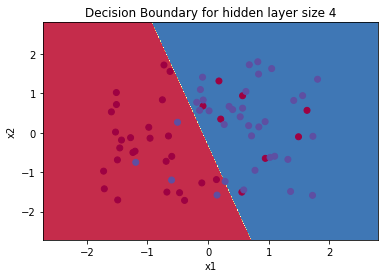

In [28]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X_train, Y_train)
plt.title("Decision Boundary for hidden layer size " + str(4))

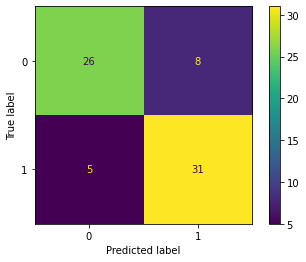

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_train.T, y_pred.T)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()